## Electric Cars Dataset Visualization 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Data Preparation

In [5]:
df = pd.read_csv('Cheapestelectriccars-EVDatabase.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [6]:
df.isna().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

In [7]:
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [9]:
df1 = df.fillna('0')
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",0
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,0,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,0,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [ ]:
it = 0
for price in df1['PriceinUK']:
    df1['PriceinUK'][it] = float(df1['PriceinUK'][it].replace('£','').replace(',','.'))
    df1['PriceinGermany'][it] = float(df1['PriceinGermany'][it].replace('€','').replace(',','.'))
    df1['FastChargeSpeed'][it] = int(df1['FastChargeSpeed'][it].replace(' km/h','').replace('-','0'))
    df1['Efficiency'][it] = int(df1['Efficiency'][it].replace('Wh/km',''))
    df1['Range'][it] = int(df1['Range'][it].replace('km',''))
    df1['TopSpeed'][it] = int(df1['TopSpeed'][it].replace(' km/h',''))
    df1['Acceleration'][it] = float(df1['Acceleration'][it].replace(' sec',''))
    df1['Subtitle'][it] = float(df1['Subtitle'][it].replace('Battery Electric Vehicle |','').replace(' kWh',''))
    it += 1
it = 0
df1.head()

In [11]:
for i in range(0, len(df1.columns)):
    df1.iloc[:,i] = pd.to_numeric(df1.iloc[:,i], errors='ignore')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Subtitle         180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    float64
 10  PriceinUK        180 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 15.6+ KB


### Data Visualization

In [13]:
data_name = df1.groupby(by='Name', as_index=False).max()
data_speed = data_name.sort_values('TopSpeed', ascending=False)

Text(0.5, 1.0, "Top 40 Cheapest Electric Cars's Top Speed")

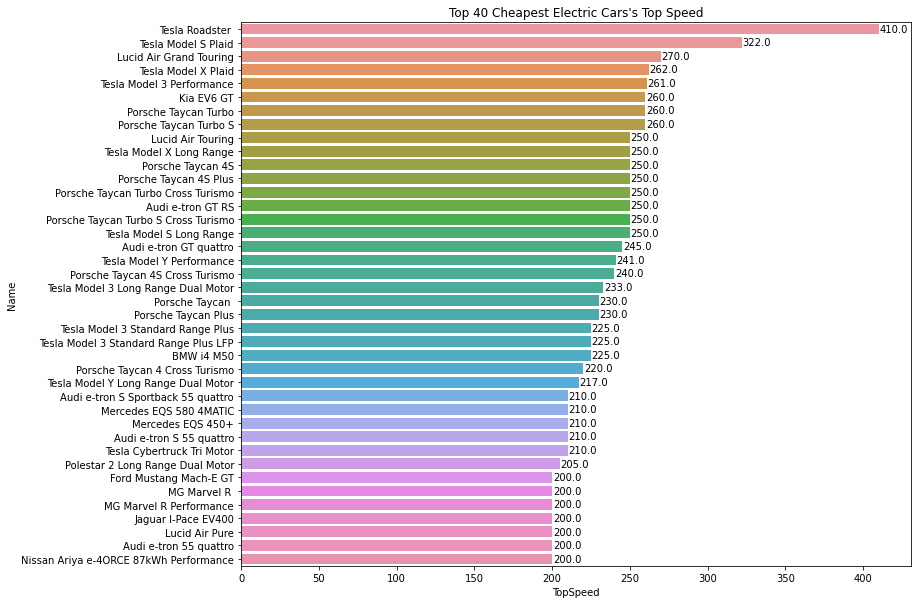

In [14]:
f, ax = plt.subplots(figsize=(12,10))
speed = sns.barplot(data=data_speed[0:40], x='TopSpeed', y='Name')
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.6, str(round((i.get_width()), 2)))
ax.set_title("Top 40 Cheapest Electric Cars's Top Speed")
### ORTALAMAYA GÖRE FİYATLAR LEGEND'İ YAPMAK

In [15]:
'''
bar = sns.barplot(data=data_speed, x='Name', y='TopSpeed')
bar.tick_params(rotation=90)
plt.savefig('Cars')
'''

"\n\nbar = sns.barplot(data=data_speed, x='Name', y='TopSpeed')\nbar.tick_params(rotation=90)\nplt.savefig('Cars')\n"

In [16]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42.990,0.000
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0.000,31.680
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29.990,25.995
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0.000,79.900
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186.336,138.830


Text(0.5, 1.0, 'Data Correlation')

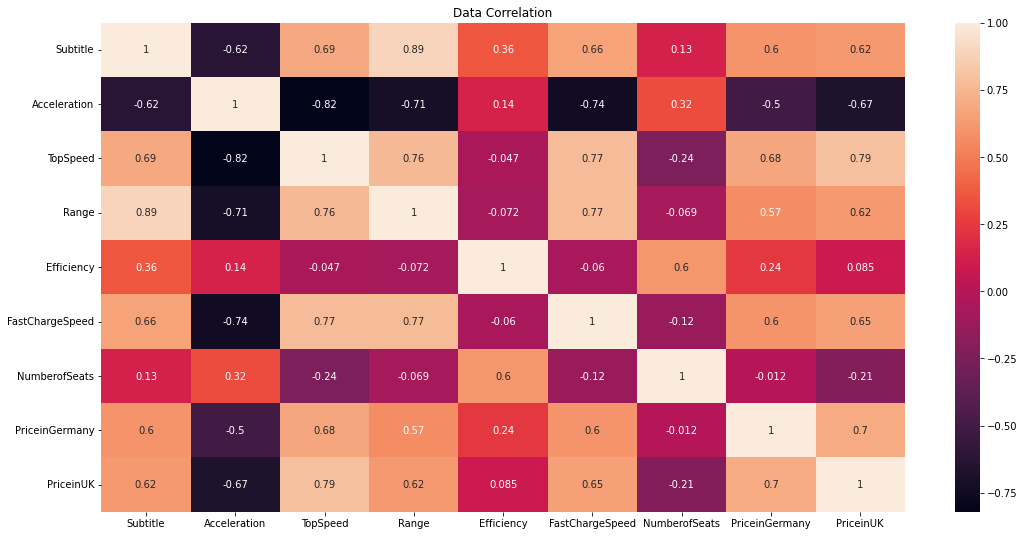

In [40]:
fig, ax = plt.subplots(figsize=(18,9))
a = sns.heatmap(df1.dropna(), annot=True)
a.tick_params(rotation=0)
ax.set_title('Data Correlation')

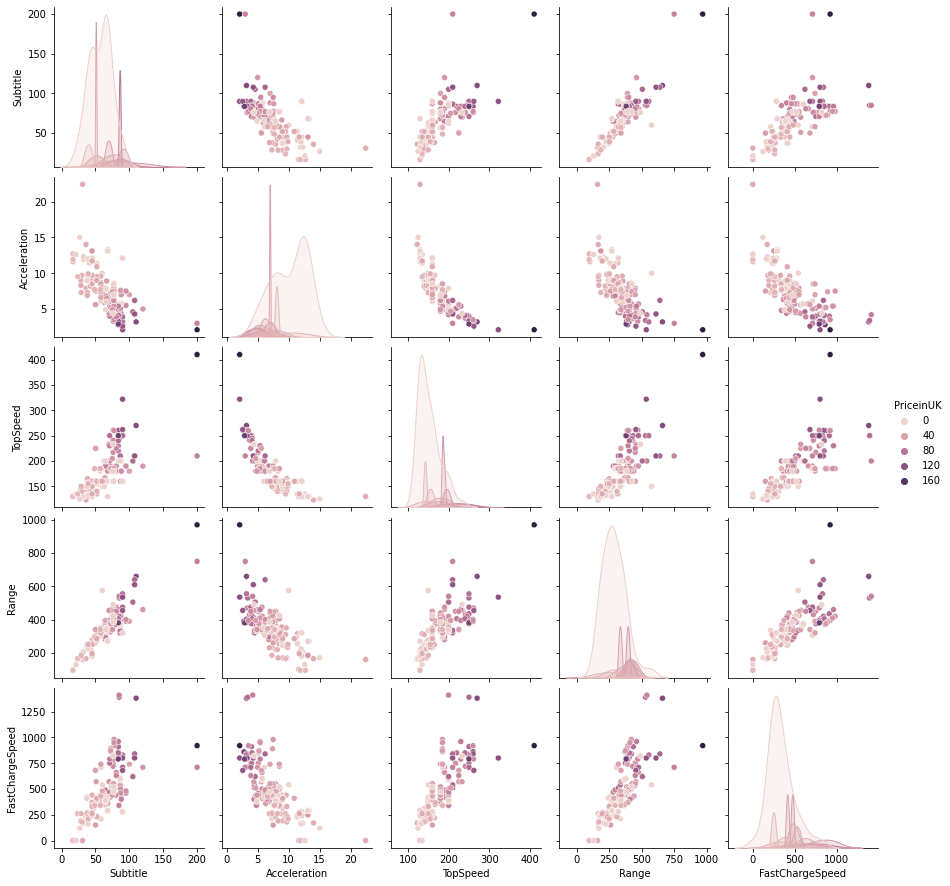

In [18]:
dff = df1[['Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'FastChargeSpeed','PriceinUK']]
sns.pairplot(dff, hue='PriceinUK')

<AxesSubplot:xlabel='Subtitle', ylabel='Range'>

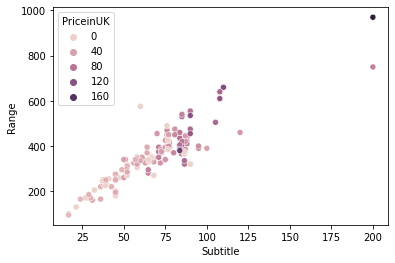

In [19]:
sns.scatterplot(data=df1, x='Subtitle', y='Range', hue='PriceinUK')

### Cleaning NaN items

In [21]:
price_data = df1[df1['PriceinUK']>1]
price_data = price_data[price_data['PriceinGermany']>1]    
price_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Subtitle,127.0,68.040157,27.116747,16.70,47.5,71.0,83.7000,200.0
Acceleration,127.0,7.013386,2.641980,2.10,5.1,7.0,8.6500,14.0
TopSpeed,127.0,184.535433,44.020521,123.00,160.0,180.0,202.5000,410.0
Range,127.0,354.173228,124.742216,95.00,275.0,350.0,407.5000,970.0
Efficiency,127.0,191.362205,28.739296,144.00,168.0,187.0,207.0000,281.0
FastChargeSpeed,127.0,519.606299,265.271354,0.00,345.0,460.0,715.0000,1410.0
NumberofSeats,127.0,5.023622,0.912563,2.00,5.0,5.0,5.0000,7.0
PriceinGermany,127.0,61.138520,35.309759,18.46,38.4,50.0,68.0325,215.0
PriceinUK,127.0,53.314819,29.185199,19.20,31.5,45.0,62.2525,189.0


<AxesSubplot:xlabel='PriceinUK', ylabel='PriceinGermany'>

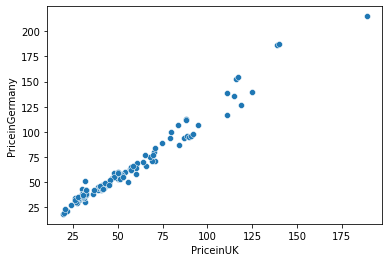

In [22]:
sns.scatterplot(data=price_data, x='PriceinUK', y='PriceinGermany')

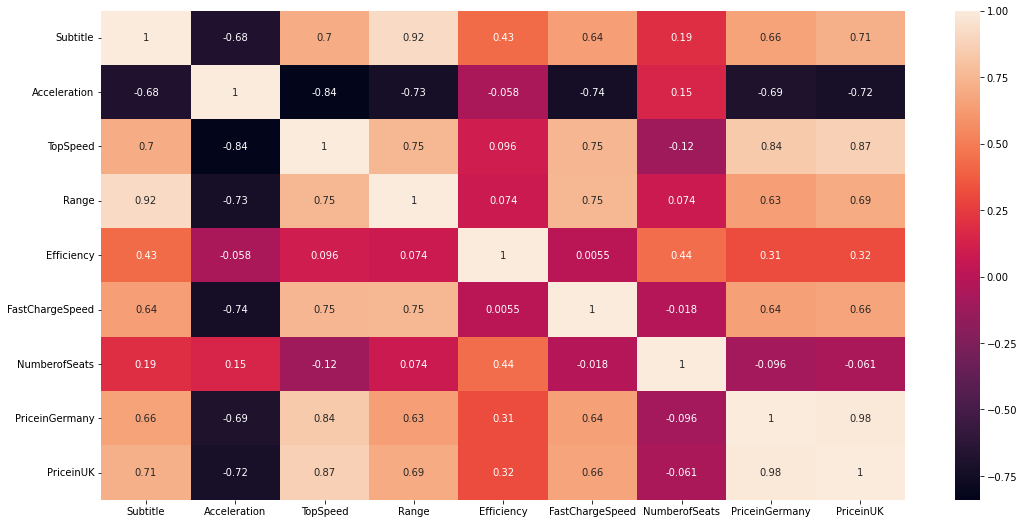

In [37]:
fig, ax = plt.subplots(figsize=(18,9))
g = sns.heatmap(price_data.corr(), annot=True)
g.tick_params(rotation=0)